In [5]:
#loading the data
import pandas as pd
import numpy as np
import gensim
import csv
from gensim.models import Word2Vec
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_style("darkgrid")
import multiprocessing 
from adjustText import adjust_text
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import FastText
from gensim.models import Phrases

In [ ]:
path_to_file = r"C:/Users/manas/Documents/Master Thesis/code/Manasa2022/data/"
file_name = 'cleaned_data.csv'

data = pd.read_csv(path_to_file + file_name)
data = data[data['skills'].notnull()]
#print(data.head())

num_worker = multiprocessing.cpu_count()
Bigger_list=[]
for i in data['skills']:
    li = list(i.split(" "))
    Bigger_list.append(li)

model= Word2Vec(Bigger_list,
                size=100,
                iter=10,
                window=20, 
                min_count=1,
                hs=1,
                sg=1,
                sample=6e-5, 
                alpha=0.03, 
                min_alpha=0.0007,
                workers=5)

print(model)
model.init_sims(replace=True)

vocab = list(model.wv.vocab) 
print(vocab)


model.wv.save_word2vec_format(r"C:/Users/manas/Documents/Master Thesis/code/Manasa2022/data/word2vec_model.txt", binary=False)

In [6]:
model_imp = gensim.models.KeyedVectors.load_word2vec_format(r"C:/Users/manas/Documents/Master Thesis/code/Manasa2022/data/word2vec_model.txt")

model_imp.similarity('product','istqb')

0.23481542

In [7]:
model_imp.most_similar('meltwater')

[('clarify', 0.4319056272506714),
 ('voertuigen', 0.3771604299545288),
 ('lngcng', 0.3752184808254242),
 ('210', 0.3671690821647644),
 ('reisleider', 0.36395514011383057),
 ('backoﬀice', 0.3628753423690796),
 ('cmii', 0.3613154888153076),
 ('hull', 0.3611879348754883),
 ('cism', 0.3546661138534546),
 ('zonneenergie', 0.35437822341918945)]

In [8]:
path_to_file = r'C:/Users/manas/Documents/Master Thesis/code/Manasa2022/data/'
file_name = 'word2vec_model.txt'


def get_fnc():
    file = open(path_to_file + file_name, 'rt',encoding='utf-8')
    reader_file = csv.reader(file)
    
    csv_list = []
    for lc in reader_file:
        csv_list.append(lc)
    file.close()
    
    return csv_list
fnc_file = pd.DataFrame(get_fnc())
fnc_file = fnc_file[0].str.split(" ",expand=True,)
fnc_file = fnc_file.dropna()
fnc_file.rename(columns = {0:'word'}, inplace = True)
fnc_file.set_index('word', inplace=True)
fnc_file.head(15)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
word,,,,,,,,,,,,,,,,,,,,,
management,0.121152736,-0.07508227,0.108428955,0.09614272,0.018084405,-0.14428551,0.07171355,-0.068871155,-0.06417991,0.078688584,...,-0.037266027,0.08870573,-0.028090857,0.06350676,0.100298636,-0.024363587,0.066860355,0.03182047,0.051483184,-0.033357665
microsoft,0.07693573,-0.022626055,0.030700505,-0.031432446,-0.028099759,0.018010726,-0.04640374,-0.06261434,-0.05987751,-0.033008896,...,-0.08534334,0.10867385,-0.016018597,-0.030838665,0.04643528,0.07607953,0.18490215,0.22702037,0.020467717,-0.046073128
development,0.1314358,0.03062024,0.043195657,0.08515775,0.098153345,0.047009103,0.043673016,0.025439244,0.11149636,0.052174028,...,-0.051116697,-0.021774422,-0.0032283817,0.27066106,-0.032321885,0.16804676,0.23294647,0.08983784,0.1037814,0.061145645
marketing,0.14334464,0.1373545,0.12130039,-0.08463286,0.10343319,-0.023840036,-0.04094971,-0.19201264,0.043678172,0.026895167,...,-0.12804036,-0.005851984,0.02291786,-0.038156703,-0.07351824,0.017473262,0.104066916,-0.016655182,0.052558627,0.09523408
business,0.080015495,0.2016916,0.04858012,0.16978766,0.09210595,0.040926054,0.043039575,-0.101445094,-0.07491327,0.12897053,...,-0.058037195,-0.0658811,-0.05550134,0.18000098,0.15908977,0.014253495,0.18243888,0.069389105,-0.10468943,0.10993939
sales,0.19878258,0.1033389,0.050744288,0.13281809,-0.0040456736,-0.049780875,0.02398832,-0.096246615,0.06036008,0.1435921,...,-0.040128455,0.08100667,0.1991522,0.06676572,-0.03503744,0.07694311,0.19302343,0.09007951,0.06568222,-0.035401847
coaching,0.073305316,-0.05474757,-0.1563565,0.19510943,0.0849471,0.012998514,0.22984917,0.008071513,0.031361315,0.13179356,...,0.0419676,-0.106405616,-0.07443652,-0.16434011,0.047235586,0.015515456,0.16862257,0.1081486,0.029002031,-0.07271145
media,0.03399865,0.13509911,-0.019432686,0.1461736,0.09643288,-0.0679142,0.0055919415,-0.1617698,-0.0216589,0.21043147,...,-0.05132975,-0.08648813,-0.019441037,-0.07040795,0.08844956,-0.07722076,0.037852515,0.21483676,-0.06950919,-0.054302584
office,-0.08404579,0.13511877,0.06423556,0.034014657,-0.04011611,0.0038058676,-0.06253138,-0.055067018,-0.0012480379,-0.027277445,...,0.082278445,0.06740072,0.04385391,0.066019826,0.010188716,0.13967837,0.19730388,0.120472066,0.02663682,-0.071732745


In [11]:
data = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\cleaned_data.csv")
data = data[data['skills'].notnull()]

In [12]:
nr_cols = max([len(text.split(" ")) for text in data["skills"]])
newtable = data["skills"].str.split(" ", n = nr_cols, expand = True)

newtable = newtable.rename(
                    columns = {column_name: 'title' + str(index) for index,column_name in enumerate(newtable.columns)}
                        )
newtable.head()

,title0,title1,title2,title3,title4,title5,title6,title7,title8,title9,title10,title11,title12,title13,title14,title15,title16,title17
0,emdr,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,io,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,product,development,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,business,development,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,automatisering,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [13]:
table_from_cols = []
columns = list(newtable) 
for col in columns:
    table_from_cols.append(pd.DataFrame(newtable[col]))

In [14]:
fnc_file['zip_vector'] = list(zip(*[fnc_file[col] for col in fnc_file.iloc[:, 0:]]))
fnc_data = fnc_file.loc[:, fnc_file.columns.isin(['zip_vector'])]
fnc_data.reset_index('word', inplace = True)
#print(fnc_data.head())

print(len(fnc_file['zip_vector'][0]))

C:\Users\manas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


100


In [15]:
line = fnc_data[fnc_data['word'] != ''].set_index('word')['zip_vector']
def mapper(row):
    myair = row[0]
    if (myair != '') and (myair in line):
        return line.get(myair)
    else:
        return (None, None)

In [16]:
def map_words(data):
    data['xy_cord'] = data.apply(mapper, axis=1)
    data[[col for col in fnc_file.iloc[:, 0:100]]] = data['xy_cord'].apply(pd.Series)
    data = data.drop('xy_cord', 1)
    data = data.replace(np.nan, 0)
    return data

In [ ]:
list_dataframe = []

for table in table_from_cols:
    list_dataframe.append(map_words(table))

job_data =  pd.concat(list_dataframe, axis=1)
job_data.head()
#job_data.shape

In [ ]:
job_data['job_title'] = job_data[columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
job_data = job_data.drop(columns, axis=1)
job_data['job_title'] = job_data['job_title'].str.replace('\d+', '')
job_data.insert(0,'job_title', job_data.pop("job_title"))
#job_data.set_index('job_title', inplace=True)
job_data.head()

In [17]:
job_fnc = job_data.iloc[:, 0]
job_val = job_data.loc[:, job_data.columns != 'job_title'].astype(float)
#job_val.head()

job_val = job_val.groupby(job_val.columns, axis=1).sum()
#job_val.head()

frame = [job_fnc, job_val]
jobFnc = pd.concat(frame, axis=1)
jobFnc.set_index('job_title', inplace=True)
jobFnc.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
job_title,,,,,,,,,,,,,,,,,,,,,
emdr,0.141943,-0.061658,0.155002,-0.028433,0.074100,-0.086352,0.034176,-0.104134,0.109742,-0.087560,...,0.093145,0.044971,0.133927,0.017567,-0.149849,0.121375,-0.051189,0.134185,0.134367,0.022486
io,-0.060843,-0.049954,0.076599,0.081315,-0.059991,0.108157,-0.159624,0.138258,0.098391,0.079058,...,0.109168,-0.066042,0.152697,0.125218,0.163738,-0.037486,0.085723,0.164906,-0.080239,-0.067601
product development,-0.172841,-0.053618,0.112773,0.072395,-0.092286,0.132454,0.098379,0.258524,-0.066742,-0.110817,...,-0.109275,0.154388,0.035139,-0.230471,0.014507,0.122328,0.087484,-0.064129,0.144196,-0.129205
business development,0.003537,0.165032,0.155516,0.033844,0.095705,0.173515,0.398308,0.136991,0.218580,0.179049,...,-0.214861,0.215140,0.166915,-0.089285,-0.119672,0.041415,0.130297,-0.211601,-0.069514,-0.080219
automatisering,-0.028353,-0.125746,-0.083907,0.140821,0.054043,0.180895,0.173205,0.073972,0.086024,0.010052,...,0.123603,-0.170717,0.050870,-0.006233,0.021184,-0.011859,0.085247,0.016490,0.037148,-0.099824


In [18]:
#cosine similarity matrix for word vector
cosine_vec = cosine_similarity(jobFnc.values)
similarity_matrix = pd.DataFrame(cosine_vec, columns=jobFnc.index.values, index=jobFnc.index)
similarity_matrix.head()

,emdr,io,product development,business development,automatisering,marketing communications,mobile devices,research,communication,new media,...,sap mm,itil v foundations certified,istqb certified,sql,agile methodologies,scrum,change management,coaching,bi,microsoft dynamics
job_title,,,,,,,,,,,,,,,,,,,,,
emdr,1.000000,-0.170981,-0.122607,-0.009567,-0.000960,0.049030,0.082795,-0.012555,-0.073576,-0.020596,...,0.060440,-0.046275,-0.086601,0.022418,-0.005153,-0.145342,-0.094365,0.066456,-0.034959,-0.120336
io,-0.170981,1.000000,0.067748,0.052927,0.172953,-0.025020,0.125854,-0.029935,0.061356,0.126776,...,0.031655,-0.099499,-0.161804,-0.000561,0.006120,0.077000,-0.053967,-0.013536,-0.001093,-0.041043
product development,-0.122607,0.067748,1.000000,0.485507,0.160285,-0.041111,-0.120918,0.030496,-0.136334,-0.087382,...,-0.177488,0.061652,0.119277,0.104819,-0.134892,0.052946,0.105572,0.089540,-0.087172,0.033207
business development,-0.009567,0.052927,0.485507,1.000000,-0.032480,-0.043813,-0.171650,-0.060201,-0.135993,-0.181944,...,0.075068,-0.152875,-0.019166,0.057284,0.074799,0.120878,0.041953,-0.032749,-0.067883,0.091740
automatisering,-0.000960,0.172953,0.160285,-0.032480,1.000000,-0.159886,0.086475,-0.042593,-0.132349,-0.022710,...,-0.105419,-0.197009,-0.056835,-0.039102,0.065118,-0.153959,-0.251549,-0.064349,-0.048752,-0.173367


In [19]:
#cosine similarity table
weight_cosine = similarity_matrix.stack()
weight_cosine = weight_cosine.rename_axis(('Source', 'Target')).reset_index(name='WeightCosine')
weight_cosine.head(100)

,Source,Target,WeightCosine
0,emdr,emdr,1.000000
1,emdr,io,-0.170981
2,emdr,product development,-0.122607
3,emdr,business development,-0.009567
4,emdr,automatisering,-0.000960
...,...,...,...
95,emdr,autocad,0.030698
96,emdr,project planning,-0.020355
97,emdr,cad,-0.043780
98,emdr,plm,-0.114213


In [20]:
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

tsne_df = tsne.fit_transform(jobFnc)
                             
w2v_data = pd.DataFrame(tsne_df, columns = ['x1', 'x2'])
w2v_data['word'] = jobFnc.index
w2v_data = w2v_data[['word', 'x1', 'x2']]
w2v_data.head()
print(w2v_data.shape) 

C:\Users\manas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(6384, 3)


C:\Users\manas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


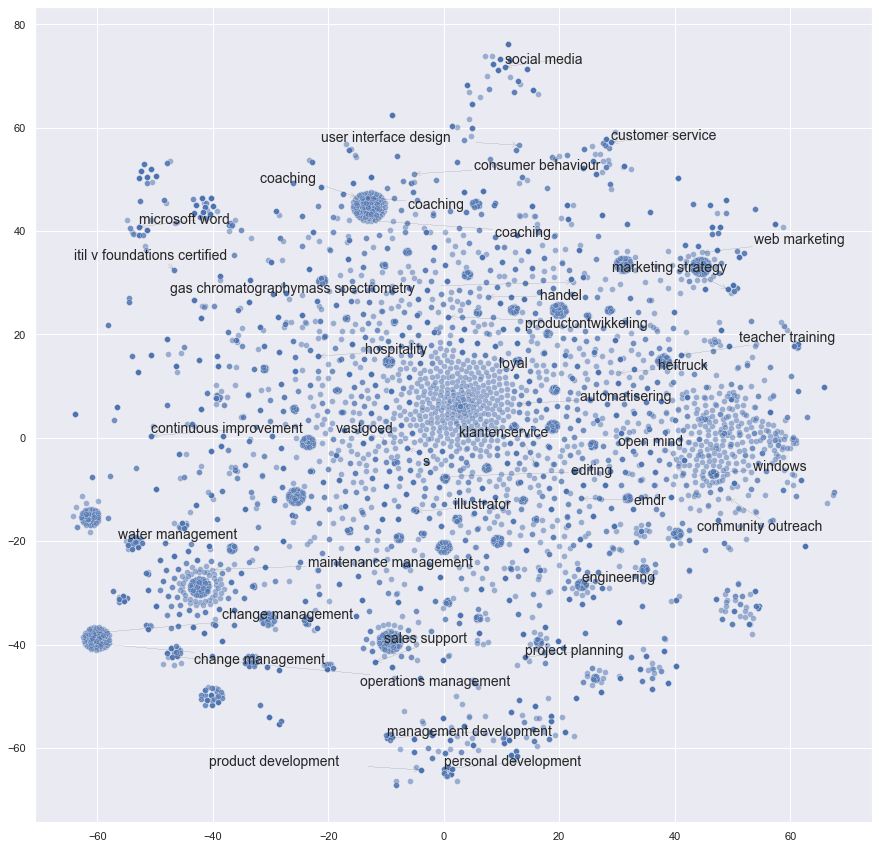

In [21]:
w2v_data.set_index('word', inplace=True)
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

texts = []
words_to_plot = list(np.arange(0, 400, 10))

for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], w2v_data.index[word], fontsize = 14))
    
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "->", color = 'black', lw = 0.10))

plt.show()